# Project - Heart Disease Prediction

# Heart Disease Prediction

## Introduction

Heart disease is one of the leading causes of death worldwide. Early detection and prevention can save many lives. Machine learning can be used to predict the presence of heart disease in patients based on various health parameters.

## Objective

The objective of this project is to build a machine learning model that can predict whether a patient has heart disease based on their medical attributes.

## Dataset

We will use the Heart Disease dataset from the UCI Machine Learning Repository. The dataset contains 14 attributes, including age, sex, chest pain type, resting blood pressure, cholesterol level, fasting blood sugar, and others.

## Steps to Build the Model

1. Importing the libraries
2. Loading the dataset
3. Data exploration and preprocessing
4. Splitting the data into training and test sets
5. Building and training the model
6. Evaluating the model
7. Making predictions
8. Conclusion



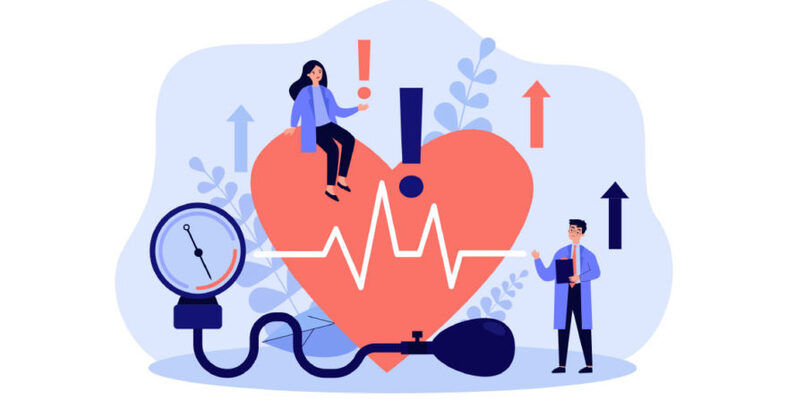

# 1. Importing the Libraries

First, we need to import the necessary libraries.

In [3]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Domain idea

- Class 0: Represents individuals without heart disease, generally considered healthy.
- Class 1: Indicates mild or early-stage heart disease symptoms or risk factors.
- Class 2: Reflects moderate heart disease, with more significant symptoms or risk.
- Class 3: Indicates severe heart disease, often with advanced symptoms.
- Class 4: Represents critical cases of heart disease, requiring immediate medical attention.

# Features Specification


- age: Age of the patient.

- sex: Gender of the patient (0 = female, 1 = male).

- cp: Type of chest pain experienced (0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic).

- trestbps: Resting blood pressure when admitted to the hospital (in mm Hg).

- chol: Cholesterol levels in the blood (in mg/dl).

- fbs: Fasting blood sugar level (>120 mg/dl considered high; 1 = high, 0 = normal).

- restecg: Results of resting electrocardiogram (ECG) (0 = normal, 1 = abnormal ST-T wave, 2 = probable or definite left ventricular hypertrophy).

- thalach: Maximum heart rate achieved during exercise.

- exang: Exercise-induced angina (1 = yes, 0 = no).

- oldpeak: ST depression induced by exercise relative to rest.

- slope: Shape of the peak exercise ST segment (0 = upsloping, 1 = flat, 2 = downsloping).

- ca: Number of major blood vessels colored by fluoroscopy (0-3).

- thal: Type of thalassemia (3 = normal, 6 = fixed defect, 7 = reversible defect).

- target: Presence of heart disease (0 = no disease, 1 = disease present).

# 2. Loading the Dataset
Load the dataset into a pandas DataFrame.

In [12]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 
    'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]
data = pd.read_csv(url, names=column_names)


In [13]:
data.sample()

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
170  70.0  1.0  3.0     160.0  269.0  0.0      0.0    112.0    1.0      2.9   

     slope   ca thal  target  
170    2.0  1.0  7.0       3

In [14]:
data.target.value_counts()

target
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

# 3. Data Exploration and Preprocessing
Explore the dataset to understand its structure and handle missing values.

In [20]:
# Display the first few rows of the dataset
print(data.head(5))

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  target  
0    3.0  0.0  6.0       0  
1    2.0  3.0  3.0       2  
2    2.0  2.0  7.0       1  
3    3.0  0.0  3.0       0  
4    1.0  0.0  3.0       0  


In [23]:
# Display dataset information
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [32]:
# Handle missing values represented by '?'
data = data.replace('?',0)
data

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0    63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1    67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2    67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3    37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4    41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   
..    ...  ...  ...       ...    ...  ...      ...      ...    ...      ...   
298  45.0  1.0  1.0     110.0  264.0  0.0      0.0    132.0    0.0      1.2   
299  68.0  1.0  4.0     144.0  193.0  1.0      0.0    141.0    0.0      3.4   
300  57.0  1.0  4.0     130.0  131.0  0.0      0.0    115.0    1.0      1.2   
301  57.0  0.0  2.0     130.0  236.0  0.0      2.0    174.0    0.0      0.0   
302  38.0  1.0  3.0     138.0  175.0  0.0      0.0    173.0    0.0      0.0   

     slope   ca thal  target  
0      3.0  0.0  6.0       0  
1      2.0  3.0  3.0       2  
2      2.0  2.0  7.0       1  
3      3.0  0.0  3.0       0  
4      1.0  0.0  3.0       0  
..     ...  ...  ...     ...  
298    2.0  0.0  7.0       1  
299    2.0  2.0  7.0       2  
300    2.0  1.0  7.0       3  
301    2.0  1.0  3.0       1  
302    1.0    0  3.0       0  

[303 rows x 14 columns]

In [36]:
# Convert columns to appropriate data types
data['column1'] = data['column1'].astype(int)



KeyError: 'column1'

# 4. Splitting the Data into Training and Test Sets
Split the dataset into training and test sets

In [38]:
X = data.drop(columns=['target'])
y = data['target']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=30)

# 5. Building and Training the Model
We will use Logistic Regression for this classification task.

In [48]:
# Standardize the features

# Build the model



scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train,y_train)


LogisticRegression()

In [ ]:
# Evaluating the Model
#Evaluate the model using accuracy, confusion matrix, and classification report.

In [54]:
# Predict the target on the test set
y_pred = model.predict(X_test)
y_pred

array([3, 0, 0, 1, 1, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       3, 3, 0, 2, 1, 0, 1, 0, 0], dtype=int64)

In [56]:
# Calculate accuracy
accuracy_score(y_test,y_pred)

0.6774193548387096

In [58]:
# Display the confusion matrix

confusion_matrix(y_test,y_pred)

array([[18,  2,  0,  0,  0],
       [ 0,  2,  1,  0,  0],
       [ 1,  1,  0,  1,  0],
       [ 0,  0,  2,  1,  0],
       [ 0,  0,  1,  1,  0]], dtype=int64)

In [60]:
# Display the classification report
classification_report(y_test,y_pred)

C:\Users\mshukla\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mshukla\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mshukla\AppData\Local\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

'              precision    recall  f1-score   support\n\n           0       0.95      0.90      0.92        20\n           1       0.40      0.67      0.50         3\n           2       0.00      0.00      0.00         3\n           3       0.33      0.33      0.33         3\n           4       0.00      0.00      0.00         2\n\n    accuracy                           0.68        31\n   macro avg       0.34      0.38      0.35        31\nweighted avg       0.68      0.68      0.68        31\n'

# 7. Making Predictions
Make predictions for new data points.

In [11]:
# Example new data point


# 8. Conclusion
In this project, we built a machine learning model to predict heart disease using logistic regression. The model was evaluated using accuracy, confusion matrix, and classification report. The final model can be used to make predictions on new patient data.